# Mark objekti - Podešavanja i napredne tehnike

## Seminarski rad - SISJ

**Autor:** Mihajlovic Luka 2020/0136, Ilic Andrija 2020/0236  
**Datum:** 23.07.2025.

---

Fokus ove lekcije je na **Mark objektima** u seaborn.objects interfejsu - njihovim tipovima, podešavanjima estetskih svojstava i naprednim tehnikama korišćenja.

## 1. **Šta su Mark objekti?**

**Mark objekti** su osnovni gradivni blokovi vizuelnih reprezentacija u Objects Interface. Oni definišu **kako** se podaci prikazuju na grafikonu.

**Ključne karakteristike Mark-ova:**
- 🎨 **Vizuelna svojstva** - boja, veličina, transparentnost, stil
- 📊 **Geometrijska forma** - tačke, linije, barovi, površine
- 🔧 **Konfiguracija** - direktno setovanje, mapiranje na podatke, scale transformacije
- ⚡ **Kompozabilnost** - mogu se kombinovati za složene vizualizacije

**Hijerarhija Mark objekata:**
```
Mark (bazni)
├── Dot/Dots - tačke
├── Line/Lines - linije  
├── Bar/Bars - barovi
├── Area/Band - površine
├── Range/Dash - segmenti
└── Text - tekstualni sadržaj
```

**Tri načina podešavanja Mark svojstava:**
1. **Direktno setovanje** - konstante vrednosti u Mark konstruktoru
2. **Mapiranje** - povezivanje sa podacima kroz Plot konstruktor  
3. **Scale transformacije** - prilagođavanje mapiranja kroz .scale() metodu

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# Uvoz Objects interface
try:
    import seaborn.objects as so
    objects_available = True
    # Preferiraj oštar vektorski prikaz u notebook-u
    try:
        so.Plot.config.display["format"] = "svg"
    except Exception:
        pass
    print("✅ Seaborn Objects Interface dostupan!")
except ImportError:
    objects_available = False
    print("⚠️ Objects interface nije dostupan")

# Podešavanje
sns.set_theme(style="whitegrid", context="talk")
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)

# Učitavanje podataka
tips = sns.load_dataset('tips')
penguins = sns.load_dataset('penguins')
flights = sns.load_dataset('flights')
diamonds = sns.load_dataset('diamonds')

# Priprema vremenske serije iz flights dataseta (umesto nedostupnog 'dowjones')
flights_ts = (
    flights.assign(
        Date=pd.to_datetime(
            flights['year'].astype(str) + '-' + flights['month'].astype(str),
            format='%Y-%b'
        ),
        Passengers=flights['passengers']
    )
    .sort_values('Date')
)

print(f"📊 Seaborn verzija: {sns.__version__}")
print(f"📈 Tips dataset: {tips.shape}")
print(f"🐧 Penguins dataset: {penguins.shape}")
print(f"✈️ Flights dataset (raw): {flights.shape}")
print(f"📈 Flights time-series: {flights_ts.shape}")
print(f"💎 Diamonds dataset: {diamonds.shape}")

print("\n🎯 U OVOM NOTEBOOK-u ĆEMO NAUČITI:")
print("• Osnovne Mark objekte (Dot, Line, Bar, Area)")
print("• Kombinovanje Mark-ova sa Stat transformacijama")
print("• Napredne tehnike sa Move objektima")
print("• Praktične primere za različite tipove podataka")
print("• Kreiranje publication-ready grafika")


✅ Seaborn Objects Interface dostupan!
📊 Seaborn verzija: 0.13.2
📈 Tips dataset: (244, 7)
🐧 Penguins dataset: (344, 7)
✈️ Flights dataset (raw): (144, 3)
📈 Flights time-series: (144, 5)
💎 Diamonds dataset: (53940, 10)

🎯 U OVOM NOTEBOOK-u ĆEMO NAUČITI:
• Osnovne Mark objekte (Dot, Line, Bar, Area)
• Kombinovanje Mark-ova sa Stat transformacijama
• Napredne tehnike sa Move objektima
• Praktične primere za različite tipove podataka
• Kreiranje publication-ready grafika


## 2. **Tipovi Mark objekata i njihova svojstva**

Svaki Mark ima specifična svojstva koja kontrolišu njegov izgled:

### **2.1 Dot/Dots Mark**
Reprezentuje podatke kao tačke (scatter plots).

**Ključna svojstva:**
- `color/fillcolor` - boja ispune
- `alpha/fillalpha` - transparentnost (0-1)
- `pointsize` - veličina tačke
- `marker` - tip markera (o, s, ^, +, x, D, itd.)
- `edgecolor` - boja obruba
- `edgewidth` - širina obruba
- `stroke` - stil obruba

### **2.2 Line/Lines Mark**
Reprezentuje podatke kao povezane linije (line plots, time series).

**Ključna svojstva:**
- `color` - boja linije
- `alpha` - transparentnost
- `linewidth` - širina linije
- `linestyle` - stil linije (-, --, :, -.)
- `marker` - markeri na tačkama
- `markersize` - veličina markera

### **2.3 Bar/Bars Mark**
Reprezentuje podatke kao pravougaonike (bar charts, histograms).

**Ključna svojstva:**
- `color/fillcolor` - boja ispune
- `alpha/fillalpha` - transparentnost
- `edgecolor` - boja obruba
- `edgewidth` - širina obruba
- `width` - širina bara (0-1)

### **2.4 Area/Band Mark**
Reprezentuje podatke kao ispunjene površine (KDE, confidence intervals).

**Ključna svojstva:**
- `color/fillcolor` - boja ispune
- `alpha/fillalpha` - transparentnost
- `edgecolor` - boja obruba linije
- `edgewidth` - širina obruba
- `baseline` - bazna linija za ispunu

### **2.5 Range/Dash Mark**
Reprezentuje podatke kao segmente ili intervale (error bars, ranges).

**Ključna svojstva:**
- `color` - boja linije
- `alpha` - transparentnost
- `linewidth` - širina linije
- `linestyle` - stil linije

### **2.6 Text Mark**
Reprezentuje podatke kao tekstualne labele (annotations, point labels).

**Ključna svojstva:**
- `color` - boja teksta
- `fontsize` - veličina fonta
- `fontweight` - težina fonta (normal, bold)
- `fontstyle` - stil fonta (normal, italic)
- `halign` - horizontalno poravnanje (left, center, right)
- `valign` - vertikalno poravnanje (top, center, bottom)
- `offset` - pomeranje od pozicije
- `rotate` - rotacija teksta u stepenima

**Praktična demonstracija osnovnih Mark tipova:**

✅ Koristi se Objects Interface


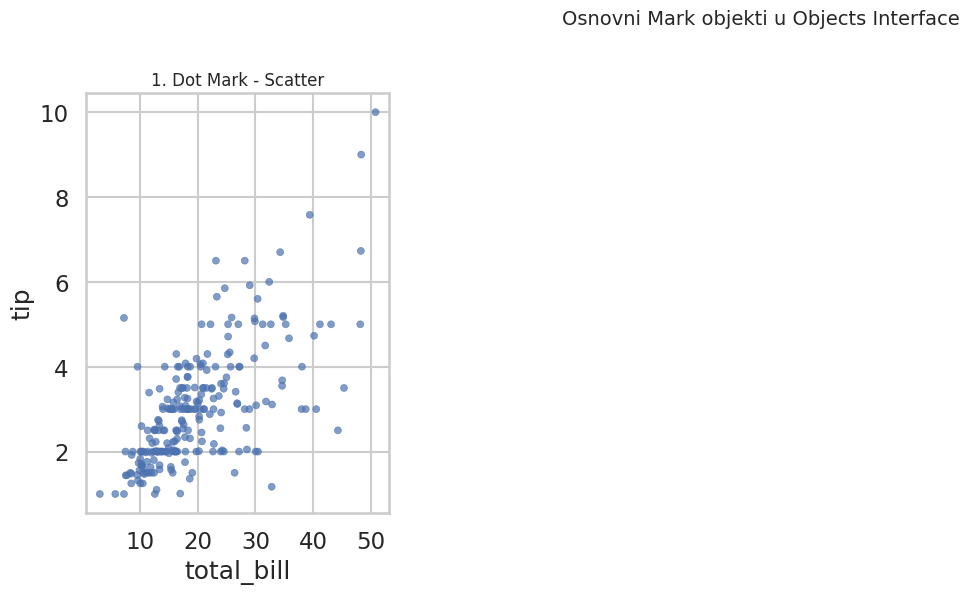

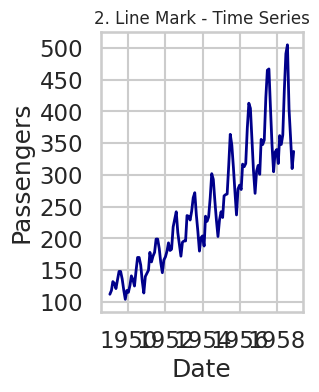

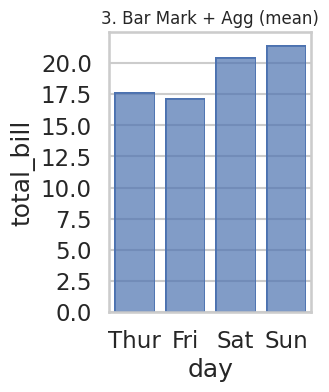

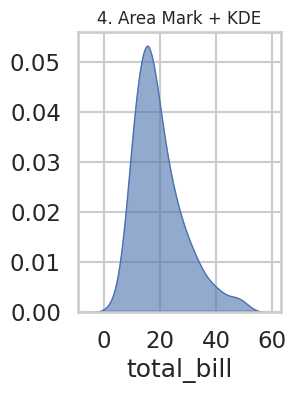

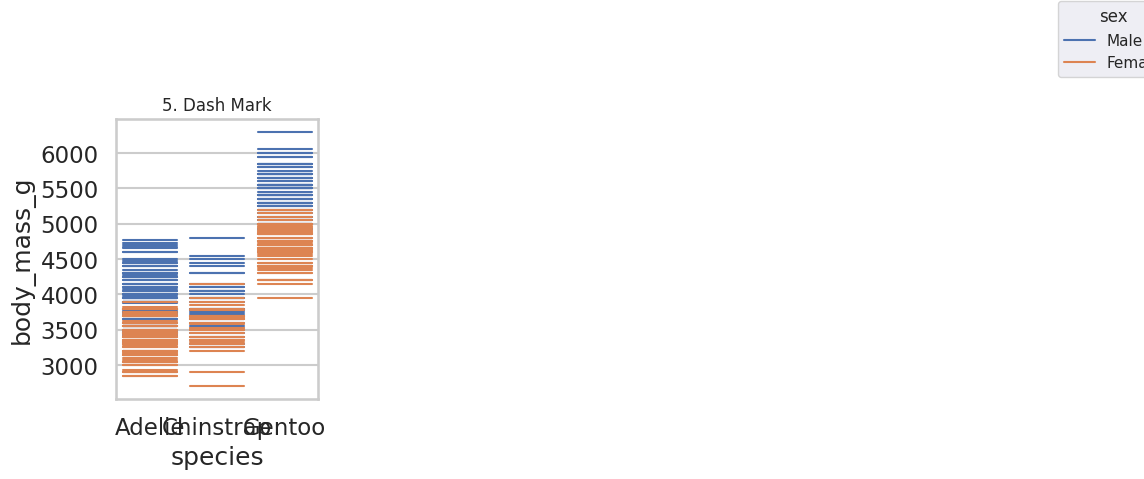

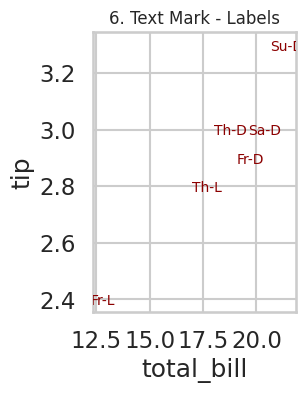

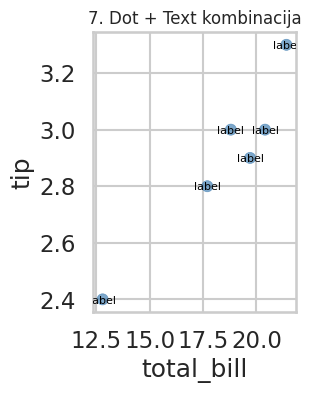

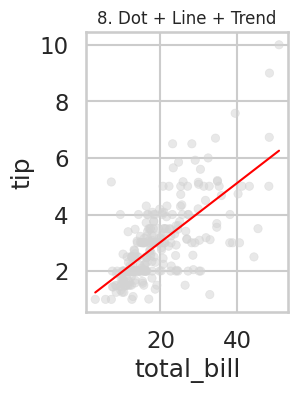

<Figure size 1200x800 with 0 Axes>

In [52]:
# Demonstracija osnovnih Mark objekata
if objects_available:
    print("✅ Koristi se Objects Interface")
    
    # Kreirat ćemo 8 zasebnih figura u grid layout-u (dodajemo Text i novo kombinaciju)
    fig = plt.figure(figsize=(18, 12))
    fig.suptitle('Osnovni Mark objekti u Objects Interface', fontsize=14, y=0.95)
    
    # 1. Dot Mark - scatter plot
    ax1 = plt.subplot(2, 4, 1)
    (so.Plot(tips, x="total_bill", y="tip")
     .add(so.Dot(pointsize=5, alpha=0.7))
     .label(title='1. Dot Mark - Scatter')
     .on(ax1)
     .show())
    
    # 2. Line Mark - vremenske serije (flights_ts)
    ax2 = plt.subplot(2, 4, 2)
    (so.Plot(flights_ts.head(120), x="Date", y="Passengers")
     .add(so.Line(linewidth=2, color="darkblue"))
     .label(title='2. Line Mark - Time Series')
     .on(ax2)
     .show())
    
    # 3. Bar Mark sa agregacijom
    ax3 = plt.subplot(2, 4, 3)
    (so.Plot(tips, x="day", y="total_bill")
     .add(so.Bar(), so.Agg(func="mean"))
     .label(title='3. Bar Mark + Agg (mean)')
     .on(ax3)
     .show())
    
    # 4. Area Mark sa KDE
    ax4 = plt.subplot(2, 4, 4)
    (so.Plot(tips, x="total_bill")
     .add(so.Area(alpha=0.6), so.KDE())
     .label(title='4. Area Mark + KDE')
     .on(ax4)
     .show())
    
    # 5. Dash Mark
    ax5 = plt.subplot(2, 4, 5)
    (so.Plot(penguins, x="species", y="body_mass_g", color="sex")
     .add(so.Dash())
     .label(title='5. Dash Mark')
     .on(ax5)
     .show())
    
    # 6. Text Mark - labeli na scatter plot
    ax6 = plt.subplot(2, 4, 6)
    # Kreiranje sređenih podataka za text labele
    tips_sample = tips.groupby(['day', 'time']).agg({
        'total_bill': 'mean', 
        'tip': 'mean'
    }).round(1).reset_index()
    tips_sample['label'] = tips_sample['day'].str[:2] + '-' + tips_sample['time'].str[:1]
    
    (so.Plot(tips_sample, x="total_bill", y="tip", text="label")
     .add(so.Text(fontsize=10, color="darkred"))
     .label(title='6. Text Mark - Labels')
     .on(ax6)
     .show())

    # 7. Kombinacija Dot + Text
    ax7 = plt.subplot(2, 4, 7)
    (so.Plot(tips_sample, x="total_bill", y="tip")
     .add(so.Dot(pointsize=8, alpha=0.7, color="steelblue"))
     .add(so.Text(text="label", fontsize=8, color="black"))
     .label(title='7. Dot + Text kombinacija')
     .on(ax7)
     .show())
     
    # 8. Kombinacija Mark-ova sa trendlinijama
    ax8 = plt.subplot(2, 4, 8)
    (so.Plot(tips, x="total_bill", y="tip")
     .add(so.Dot(alpha=0.5, color="lightgray"))
     .add(so.Line(color="red"), so.PolyFit(order=1))
     .label(title='8. Dot + Line + Trend')
     .on(ax8)
     .show())

else:
    print("⚠️ Objects interface nije dostupan, koristi se traditionalni pristup")
    
    fig, axes = plt.subplots(2, 4, figsize=(18, 12))
    fig.suptitle('Osnovni Mark objekti - Fallback', fontsize=14, y=0.95)
    
    # Fallback sa traditionalnim seaborn funkcijama
    sns.scatterplot(data=tips, x="total_bill", y="tip", ax=axes[0,0])
    axes[0,0].set_title('1. Scatter Plot')
    
    sns.lineplot(data=flights_ts.head(120), x="Date", y="Passengers", ax=axes[0,1])
    axes[0,1].set_title('2. Line Plot')
    
    sns.barplot(data=tips, x="day", y="total_bill", ax=axes[0,2])
    axes[0,2].set_title('3. Bar Plot')
    
    sns.kdeplot(data=tips, x="total_bill", fill=True, ax=axes[0,3])
    axes[0,3].set_title('4. KDE Plot')
    
    sns.pointplot(data=penguins, x="species", y="body_mass_g", hue="sex", ax=axes[1,0])
    axes[1,0].set_title('5. Point Plot')
    
    # Text equivalent sa matplotlib
    tips_sample = tips.groupby(['day', 'time']).agg({
        'total_bill': 'mean', 'tip': 'mean'
    }).round(1).reset_index()
    for i, row in tips_sample.iterrows():
        axes[1,1].text(row['total_bill'], row['tip'], 
                      f"{row['day'][:2]}-{row['time'][0]}", 
                      fontsize=10, color='darkred', fontweight='bold')
    axes[1,1].set_xlabel('Total Bill')
    axes[1,1].set_ylabel('Tip')
    axes[1,1].set_title('6. Text Labels')
    
    sns.scatterplot(data=tips_sample, x="total_bill", y="tip", ax=axes[1,2])
    for i, row in tips_sample.iterrows():
        axes[1,2].annotate(f"{row['day'][:2]}-{row['time'][0]}", 
                          (row['total_bill'], row['tip']),
                          xytext=(3, 0), textcoords='offset points',
                          fontsize=8, ha='left')
    axes[1,2].set_title('7. Scatter + Text')
    
    sns.regplot(data=tips, x="total_bill", y="tip", ax=axes[1,3])
    axes[1,3].set_title('8. Regression Plot')
    
    # Rotacija labela za bolje čitanje
    for ax in axes.flat:
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. **Podešavanja svojstava Mark objekata**

Postoje **tri glavna načina** podešavanja svojstava Mark objekata:

### **3.1 Direktno setovanje (konstante)**
Svojstva se postavljaju direktno u Mark konstruktoru sa konstantnim vrednostima.

```python
so.Dot(color="red", pointsize=8, alpha=0.7)
so.Line(linewidth=3, linestyle="--")
so.Bar(edgecolor="black", edgewidth=1.5)
```

### **3.2 Mapiranje na podatke** 
Svojstva se mapiraju na kolone dataseta kroz Plot konstruktor.

```python
so.Plot(data, x="var1", y="var2", 
        color="category",     # mapira boju na kategoriju
        pointsize="value",    # mapira veličinu na numeričku vrednost
        marker="type")        # mapira marker na tip
```

### **3.3 Scale transformacije**
Mapiranje se prilagođava kroz `.scale()` metodu.

```python
.scale(
    color="Set2",                    # koristi Set2 paletu
    pointsize=(2, 12),              # opseg veličine tačaka
    marker=so.Nominal(["o", "s"])    # specifični markeri
)
```

**Demonstracija tri pristupa podešavanja:**

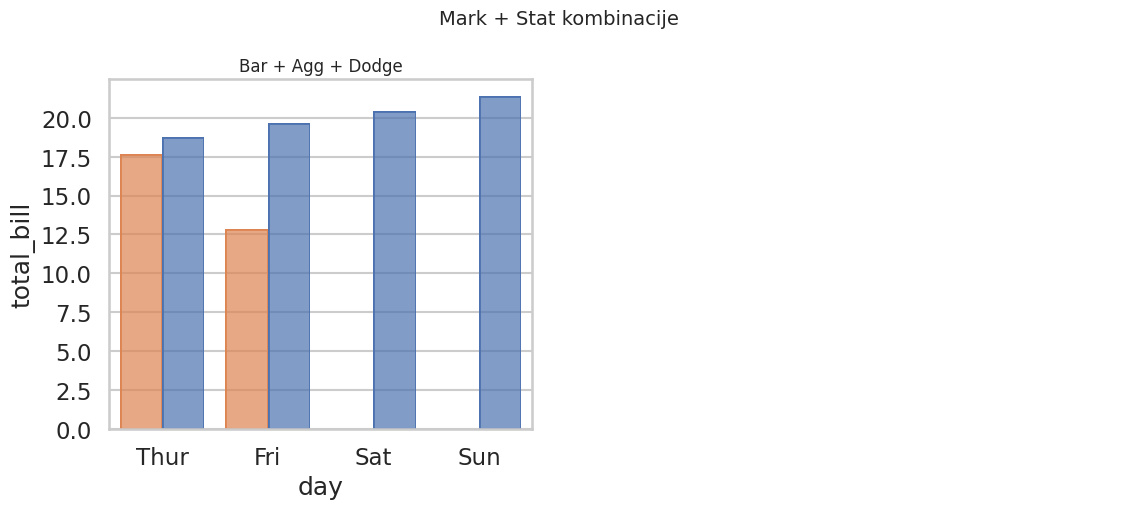

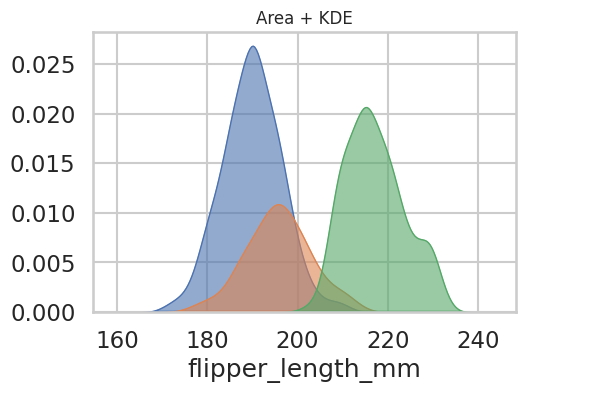

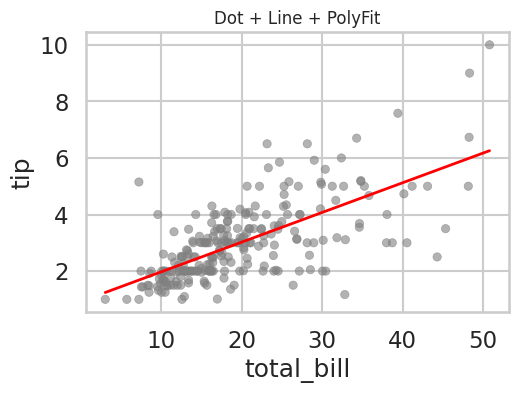

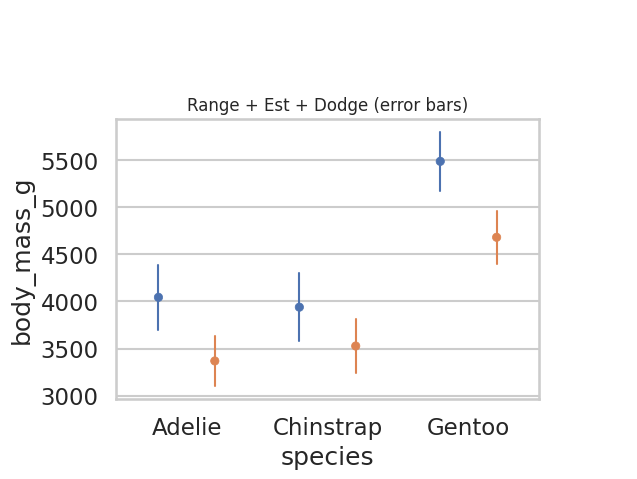

<Figure size 1200x800 with 0 Axes>


✅ KOMBINACIJE MARK + STAT:
• Bar + Agg: kategorijske analize sa agregacijom
• Area + KDE: glatke distribucije
• Dot + Line + PolyFit: regresijska analiza
• Range + Est + Dodge: error bars posle agregacije s grupisanjem


In [53]:
# Kombinovanje Mark-ova sa Stat objektima
if objects_available:
    fig = plt.figure(figsize=(12, 10))
    fig.suptitle('Mark + Stat kombinacije', fontsize=14, y=0.95)
    
    # 1. Bar + Agg - kategorijske analize (mean + dodge)
    ax1 = plt.subplot(2, 2, 1)
    (so.Plot(tips, x="day", y="total_bill", color="time")
     .add(so.Bar(), so.Agg(func="mean"), so.Dodge())
     .label(title='Bar + Agg + Dodge')
     .on(ax1)
     .show())

    # 2. Area + KDE - distribucije
    ax2 = plt.subplot(2, 2, 2)
    (so.Plot(penguins, x="flipper_length_mm", color="species")
     .add(so.Area(alpha=0.6), so.KDE())
     .label(title='Area + KDE')
     .on(ax2)
     .show())

    # 3. Dot + Line + PolyFit - regresijska analiza
    ax3 = plt.subplot(2, 2, 3)
    (so.Plot(tips, x="total_bill", y="tip")
     .add(so.Dot(alpha=0.6, color="gray"))
     .add(so.Line(color="red", linewidth=2), so.PolyFit(order=1))
     .label(title='Dot + Line + PolyFit')
     .on(ax3)
     .show())

    # 4. Range + Est - error bars posle agregacije
    ax4 = plt.subplot(2, 2, 4)
    (so.Plot(penguins.dropna(), x="species", y="body_mass_g", color="sex")
     .add(so.Range(), so.Est(errorbar="sd"), so.Dodge())
     .add(so.Dot(pointsize=6), so.Agg(func="mean"), so.Dodge())
     .label(title='Range + Est + Dodge (error bars)')
     .on(ax4)
     .show())

else:
    # Fallback sa tradicionalnim seaborn-om
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Mark + Stat kombinacije - Fallback', fontsize=14)
    
    sns.barplot(data=tips, x="day", y="total_bill", hue="time", ax=axes[0,0])
    axes[0,0].set_title('Grouped Bar Plot')
    
    for species in penguins['species'].unique():
        if pd.notna(species):
            data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
            if len(data) > 0:
                sns.kdeplot(data, fill=True, alpha=0.6, label=species, ax=axes[0,1])
    axes[0,1].legend()
    axes[0,1].set_title('Multiple KDE')
    
    sns.regplot(data=tips, x="total_bill", y="tip", ax=axes[1,0])
    axes[1,0].set_title('Regression Plot')
    
    sns.barplot(data=penguins, x="species", y="body_mass_g", hue="sex", ax=axes[1,1])
    axes[1,1].set_title('Bar + SE')

plt.tight_layout()
plt.show()

print("\n✅ KOMBINACIJE MARK + STAT:")
print("• Bar + Agg: kategorijske analize sa agregacijom")
print("• Area + KDE: glatke distribucije")
print("• Dot + Line + PolyFit: regresijska analiza")
print("• Range + Est + Dodge: error bars posle agregacije s grupisanjem")

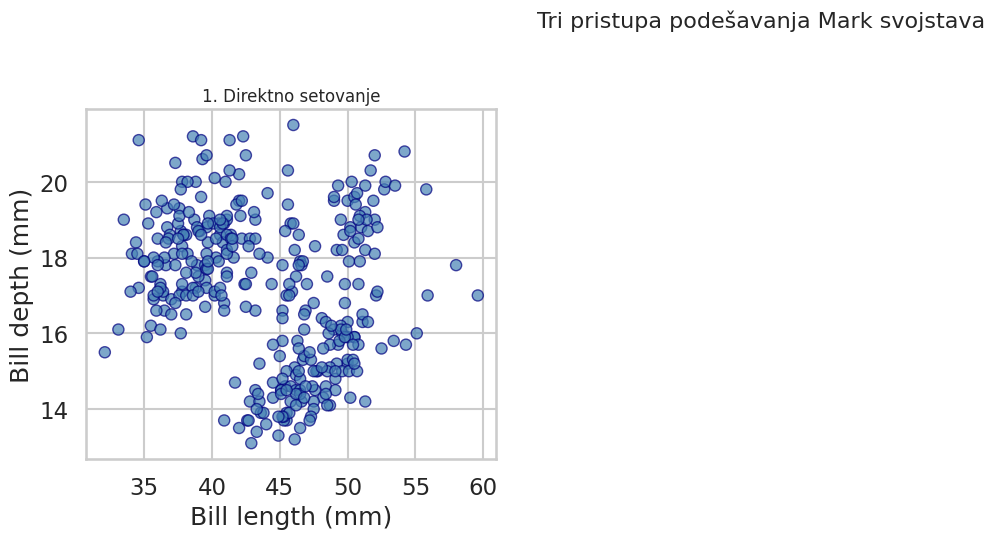

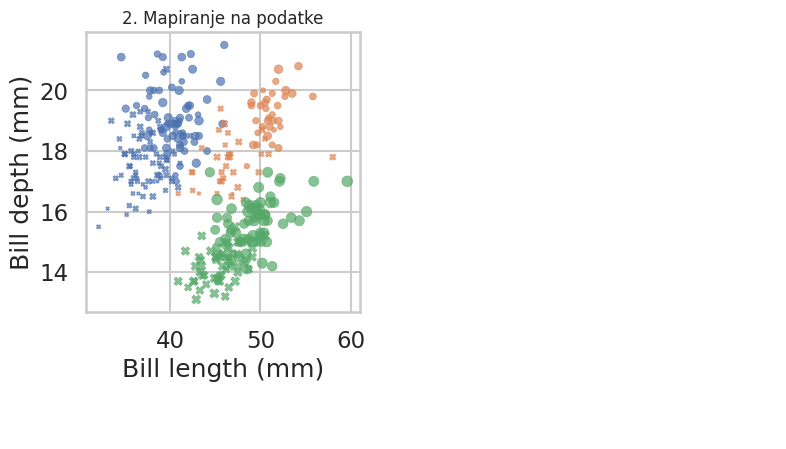

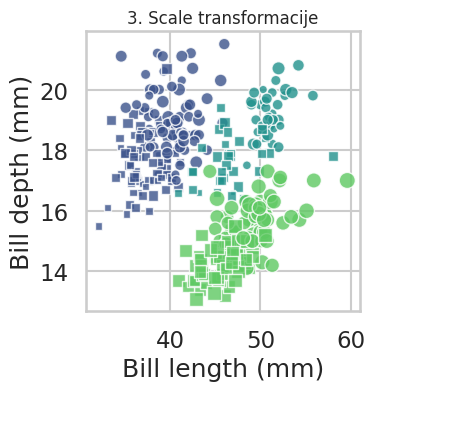

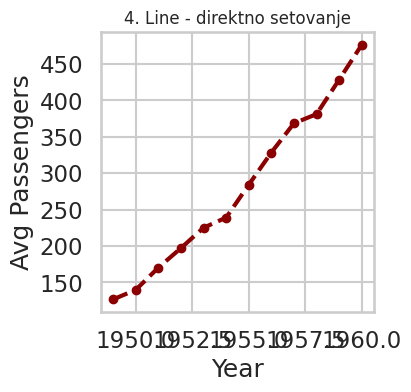

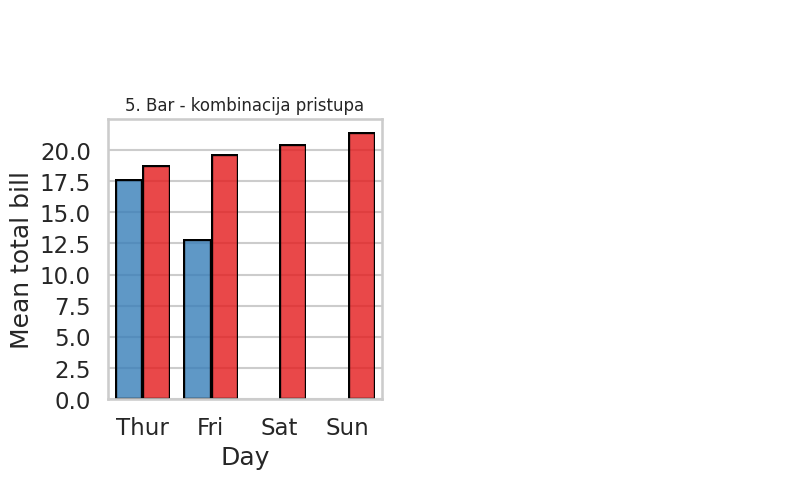

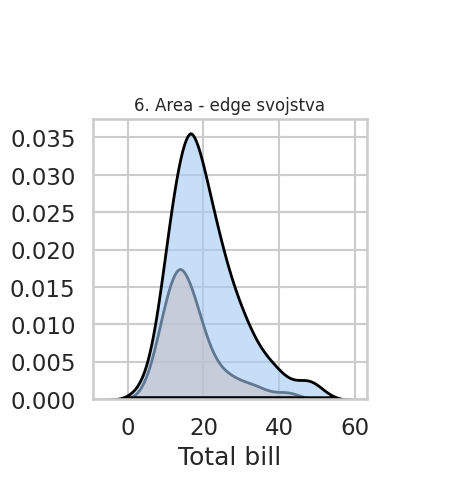

<Figure size 1200x800 with 0 Axes>

✅ POREĐENJE PRISTUPA:
• Direktno setovanje: Brzo, konzistentno, statično
• Mapiranje: Dinamično, podaci upravljaju izgledom
• Scale transformacije: Najbolje od oba sveta - kontrola + podatci


In [54]:
# Detaljno poređenje pristupa podešavanja Mark svojstava
if objects_available:
    fig = plt.figure(figsize=(18, 10))
    fig.suptitle('Tri pristupa podešavanja Mark svojstava', fontsize=16, y=0.98)

    # === PRVI RED: DOT MARK PRIMERI ===
    
    # 1. Direktno setovanje - sve konstante
    ax1 = plt.subplot(2, 3, 1)
    (
        so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
        .add(so.Dot(color="steelblue", pointsize=8, alpha=0.7, 
                   edgecolor="navy", edgewidth=1, marker="o"))
        .label(title="1. Direktno setovanje", 
               x="Bill length (mm)", y="Bill depth (mm)")
        .on(ax1)
        .show()
    )

    # 2. Mapiranje - svojstva vezana za podatke
    ax2 = plt.subplot(2, 3, 2)
    (
        so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm",
                color="species", pointsize="body_mass_g", marker="sex")
        .add(so.Dot(alpha=0.7, edgewidth=0.5))
        .label(title="2. Mapiranje na podatke",
               x="Bill length (mm)", y="Bill depth (mm)")
        .on(ax2)
        .show()
    )

    # 3. Scale transformacije - prilagođavanje mapiranja
    ax3 = plt.subplot(2, 3, 3)
    (
        so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm",
                color="species", pointsize="body_mass_g", marker="sex")
        .add(so.Dot(alpha=0.8, edgecolor="white", edgewidth=1))
        .scale(
            color="viridis",                    # custom paleta
            pointsize=(4, 12),                  # opseg veličine
            marker=so.Nominal(["o", "s", "^"])  # custom markeri
        )
        .label(title="3. Scale transformacije",
               x="Bill length (mm)", y="Bill depth (mm)",
               color="Species", pointsize="Body mass (g)", marker="Sex")
        .on(ax3)
        .show()
    )

    # === DRUGI RED: LINE I BAR MARK PRIMERI ===
    
    # 4. Line Mark - direktno vs mapiranje
    flights_sample = flights_ts.groupby('year')['Passengers'].mean().reset_index()
    
    # Direktno setovanje Line-a
    ax4 = plt.subplot(2, 3, 4)
    (
        so.Plot(flights_sample, x="year", y="Passengers")
        .add(so.Line(color="darkred", linewidth=3, linestyle="--", 
                    marker="o"))
        .label(title="4. Line - direktno setovanje",
               x="Year", y="Avg Passengers")
        .on(ax4)
        .show()
    )
    
    # 5. Bar Mark - kombinacija pristupa
    ax5 = plt.subplot(2, 3, 5)
    (
        so.Plot(tips, x="day", y="total_bill", color="time")
        .add(so.Bar(edgecolor="black", edgewidth=1.2, alpha=0.8), 
             so.Agg("mean"), so.Dodge())
        .scale(color="Set1")
        .label(title="5. Bar - kombinacija pristupa",
               x="Day", y="Mean total bill", color="Time")
        .on(ax5)
        .show()
    )
    
    # 6. Area Mark - KDE sa edge svojstvima
    ax6 = plt.subplot(2, 3, 6)
    (
        so.Plot(tips, x="total_bill", color="time")
        .add(so.Area(alpha=0.6, edgecolor="black", edgewidth=2), so.KDE())
        .scale(color="pastel")
        .label(title="6. Area - edge svojstva",
               x="Total bill", color="Time")
        .on(ax6)
        .show()
    )

    plt.tight_layout()
    plt.show()
    
    print("✅ POREĐENJE PRISTUPA:")
    print("• Direktno setovanje: Brzo, konzistentno, statično")
    print("• Mapiranje: Dinamično, podaci upravljaju izgledom")  
    print("• Scale transformacije: Najbolje od oba sveta - kontrola + podatci")
    
else:
    print("⚠️ Objects interface nije dostupan")

## 4. **Napredne tehnike podešavanja Mark svojstava**

### **4.1 Kombinovanje pristupa**
Možete kombinovati različite pristupe za maksimalnu fleksibilnost:

```python
so.Plot(data, x="x", y="y", color="category")  # mapiranje
.add(so.Dot(alpha=0.7, edgewidth=1))           # direktno setovanje
.scale(color="viridis", pointsize=(2, 10))     # scale transformacije
```

### **4.2 Uslovno podešavanje**
Mark svojstva se mogu podešavati uslovno na osnovu podataka:

```python
# Različite boje za pozitivne/negativne vrednosti
so.Plot(data, x="x", y="y", color="y")
.scale(color=so.Continuous().with_diverging_center())
```

### **4.3 Edge svojstva za kompleksnost**
Edge svojstva dodaju dubinu vizualizaciji:

- `edgecolor` - različito od main color-a
- `edgewidth` - kontrola debljine
- Kombinacija sa `alpha` za slojevite efekte

### **4.4 Marker svojstva za kategorije**
Marker tipovi mogu nositi semantičko značenje:

| **Marker** | **Simbol** | **Najbolji za** |
|------------|------------|-----------------|
| `"o"` | ○ | Neutralne kategorije |
| `"s"` | ◇ | Važne kategorije |
| `"^"` | ▲ | Pozitivni trend |
| `"v"` | ▼ | Negativni trend |
| `"+"` | + | Intervention points |
| `"x"` | × | Missing/excluded |

### **4.5 Alpha strategije za overlapping**
- **Alpha < 0.5** - za guste podatke (>1000 tačaka)
- **Alpha 0.6-0.8** - za umerenu gustinu (100-1000 tačaka)  
- **Alpha > 0.8** - za retke podatke (<100 tačaka)

**Demonstracija naprednih tehnika:**

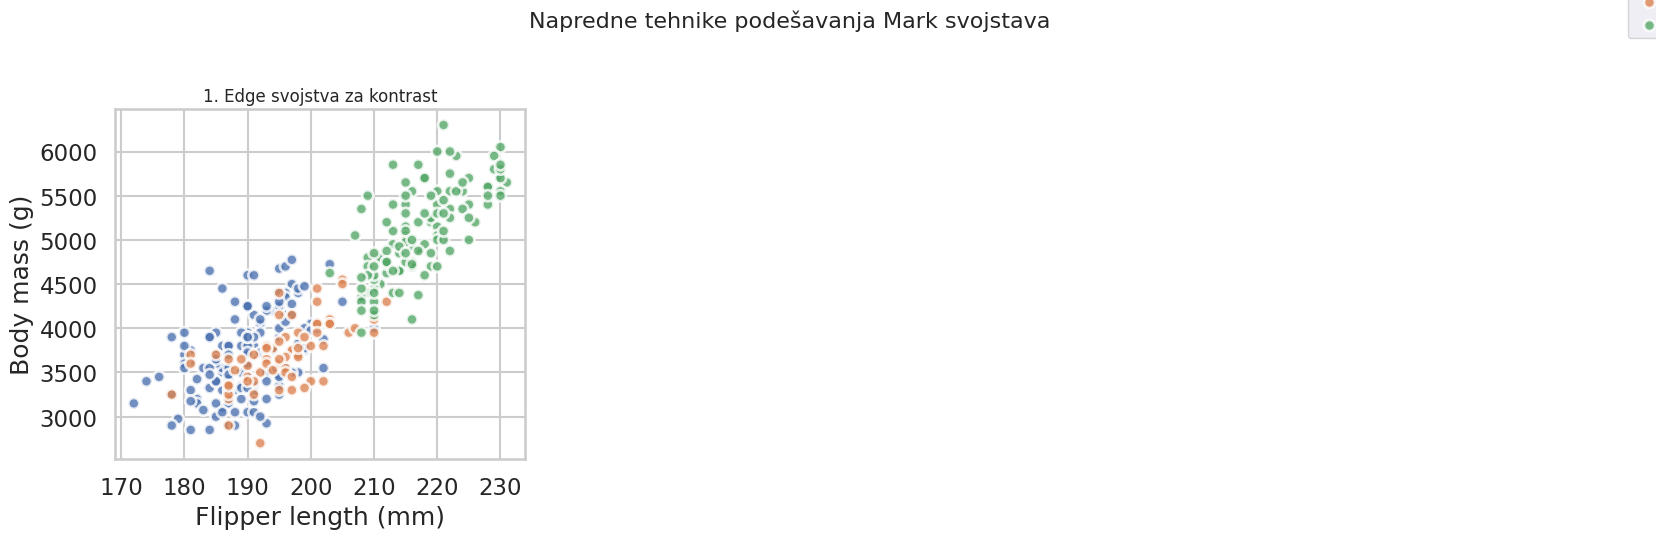

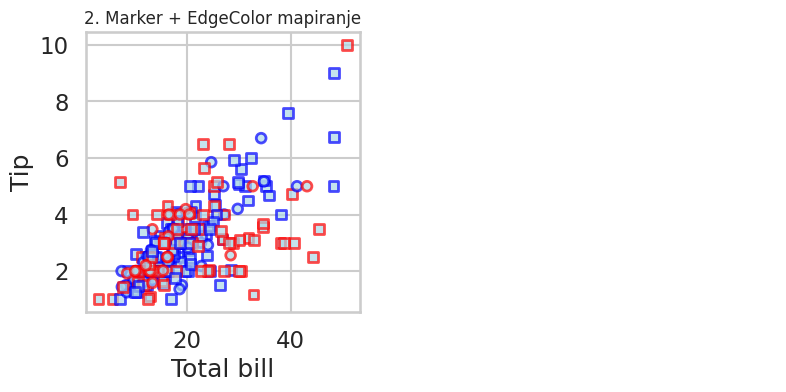

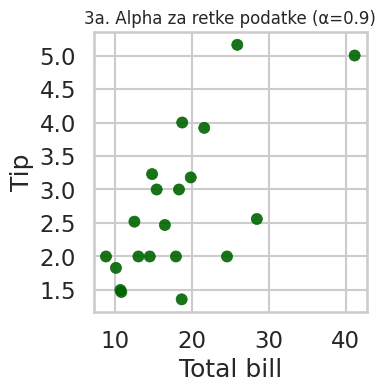

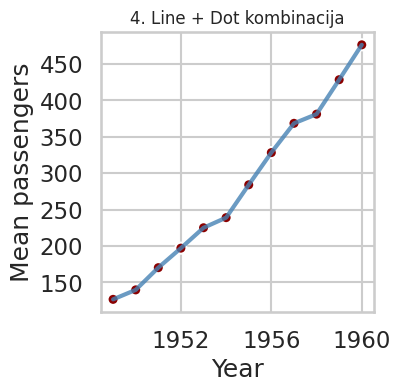

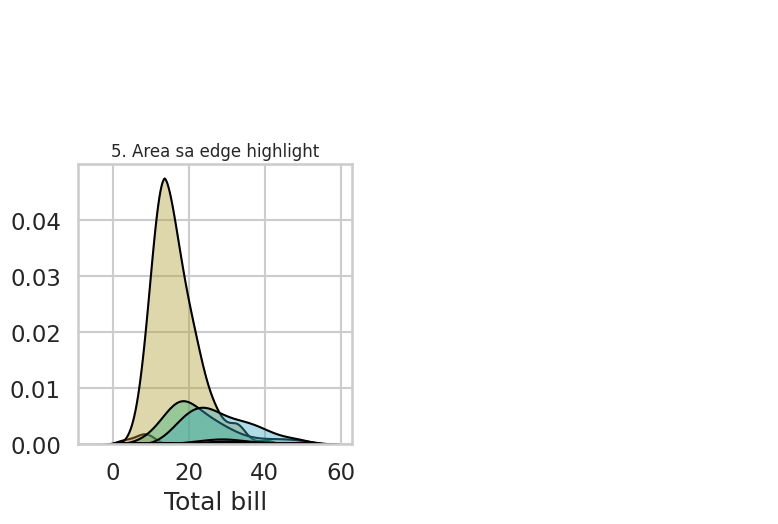

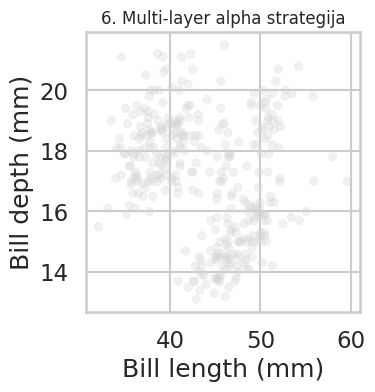

<Figure size 1200x800 with 0 Axes>

✅ NAPREDNE TEHNIKE REZULTATI:
• Edge svojstva: Dodaju kontrast i dubinu vizualizaciji
• Uslovno mapiranje: Marker + EdgeColor za multi-dimensionalne podatke
• Alpha strategije: Prilagođavanje gustini podataka
• Multi-layer: Background + foreground za naglašavanje
• Kombinovanje Mark-ova: Line + Dot za više informacija


In [55]:
# Napredne tehnike podešavanja Mark svojstava
if objects_available:
    plt.figure(figsize=(18, 10))
    plt.suptitle('Napredne tehnike podešavanja Mark svojstava', fontsize=16, y=0.98)

    # 1. Edge svojstva za dubinu
    ax1 = plt.subplot(2, 3, 1)
    (
        so.Plot(penguins, x="flipper_length_mm", y="body_mass_g", color="species")
        .add(so.Dot(pointsize=8, alpha=0.8, 
                   edgecolor="white", edgewidth=2))
        .scale(color="deep")
        .label(title="1. Edge svojstva za kontrast",
               x="Flipper length (mm)", y="Body mass (g)", color="Species")
        .on(ax1).show()
    )

    # 2. Uslovno marker setovanje sa edge
    ax2 = plt.subplot(2, 3, 2)
    (
        so.Plot(tips, x="total_bill", y="tip", 
                marker="time", edgecolor="smoker")
        .add(so.Dot(pointsize=7, alpha=0.7, color="lightblue", edgewidth=2))
        .scale(
            marker=so.Nominal(["o", "s"]),  # Lunch=circle, Dinner=square
            edgecolor=so.Nominal({"Yes": "red", "No": "blue"})  # Smoker colors
        )
        .label(title="2. Marker + EdgeColor mapiranje",
               x="Total bill", y="Tip", marker="Time", edgecolor="Smoker")
        .on(ax2).show()
    )

    # 3. Alpha strategije za različite gustine
    # Kreiranje različitih gustina podataka
    sparse_data = tips.sample(20, random_state=42)
    dense_data = tips.sample(200, random_state=42)
    
    ax3 = plt.subplot(2, 3, 3)
    (
        so.Plot(sparse_data, x="total_bill", y="tip")
        .add(so.Dot(color="darkgreen", pointsize=8, alpha=0.9))
        .label(title="3a. Alpha za retke podatke (α=0.9)",
               x="Total bill", y="Tip")
        .on(ax3).show()
    )

    # 4. Kombinacija Line + Dot sa različitim svojstvima
    monthly_flights = flights_ts.groupby(flights_ts['Date'].dt.to_period('Y')).agg({
        'Passengers': ['mean', 'std']
    }).round(1)
    monthly_flights.columns = ['mean_passengers', 'std_passengers']
    monthly_flights = monthly_flights.reset_index()
    monthly_flights['Date'] = monthly_flights['Date'].dt.start_time

    ax4 = plt.subplot(2, 3, 4)
    (
        so.Plot(monthly_flights, x="Date", y="mean_passengers")
        .add(so.Line(color="steelblue", linewidth=3, alpha=0.8))
        .add(so.Dot(color="darkred", pointsize=8, 
                   edgecolor="white", edgewidth=1.5))
        .label(title="4. Line + Dot kombinacija",
               x="Year", y="Mean passengers")
        .on(ax4).show()
    )

    # 5. Area sa custom edge za highlight
    ax5 = plt.subplot(2, 3, 5)
    (
        so.Plot(tips, x="total_bill", color="size")
        .add(so.Area(alpha=0.4, edgecolor="black", edgewidth=1.5), so.KDE())
        .scale(color="husl")
        .label(title="5. Area sa edge highlight",
               x="Total bill", color="Party size")
        .on(ax5).show()
    )

    # 6. Multi-layer sa različitim alpha strategijama
    # Prvo layer - svi podaci kao background
    ax6 = plt.subplot(2, 3, 6)
    (
        so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm")
        .add(so.Dot(color="lightgray", alpha=0.3, pointsize=6))
        .label(title="6. Multi-layer alpha strategija",
               x="Bill length (mm)", y="Bill depth (mm)")
        .on(ax6).show()
    )
    
    # Drugi layer - highlight Gentoo species
    (
        so.Plot(penguins[penguins["species"] == "Gentoo"], 
                x="bill_length_mm", y="bill_depth_mm")
        .add(so.Dot(color="green", alpha=0.8, pointsize=8,
                   edgecolor="white", edgewidth=1))
        .on(ax6).show()
    )

    plt.tight_layout()
    plt.show()
    
    print("✅ NAPREDNE TEHNIKE REZULTATI:")
    print("• Edge svojstva: Dodaju kontrast i dubinu vizualizaciji")
    print("• Uslovno mapiranje: Marker + EdgeColor za multi-dimensionalne podatke")  
    print("• Alpha strategije: Prilagođavanje gustini podataka")
    print("• Multi-layer: Background + foreground za naglašavanje")
    print("• Kombinovanje Mark-ova: Line + Dot za više informacija")
    
else:
    print("⚠️ Objects interface nije dostupan")

## 5. **Scale objekti - Napredna kontrola mapiranja**

**Scale objekti** definišu kako se podaci transformišu u vizuelna svojstva Mark objekata.

### **5.1 Tipovi Scale objekata**

| **Scale** | **Za svojstvo** | **Upotreba** |
|-----------|----------------|---------------|
| `(min, max)` | Numerička svojstva | pointsize, linewidth, edgewidth |
| `so.Nominal({})` | Kategorijska svojstva | color, marker, linestyle |  
| Paleta string | Color mapiranje | "viridis", "Set2", "husl" |

### **5.2 Scale sintaksa za Mark svojstva**

**Continuous (numerička) svojstva:**
```python
.scale(pointsize=(2, 15))        # Opseg veličine tačaka
.scale(linewidth=(0.5, 3.0))     # Opseg širine linija  
.scale(edgewidth=(1, 5))         # Opseg širine obruba
```

**Nominal (kategorijska) svojstva:**
```python
.scale(color=so.Nominal({"A": "red", "B": "blue"}))    # Custom boje
.scale(marker=so.Nominal(["o", "s", "^"]))             # Custom markeri
```

**Color palete (string):**
```python
.scale(color="viridis")          # Continuous paleta
.scale(color="Set2")             # Qualitative paleta  
.scale(color="RdBu_r")           # Diverging paleta
```

**Praktična demonstracija Scale kontrole:**

## 4.6. **Move objekti - Optimizacija pozicioniranja**

**Move objekti** kontrolišu kako se podaci pozicioniraju na grafikonu kada dolazi do preklapanja ili kada treba grupisanje.

### **4.6.1 Tipovi Move objekata**

| **Move** | **Svrha** | **Najbolji za** |
|----------|-----------|-----------------|
| `so.Jitter()` | Dodaje nasumičnu varijaciju pozicije | Guste tačke, kategorijski scatter |
| `so.Dodge()` | Pomeranje kategorijskih grupa | Bar plots, box plots sa grupama |
| `so.Stack()` | Slaganje podataka vertikalno | Stacked bar charts, area charts |
| `so.Shift()` | Kontrolisano pomeranje | Fine-tuning pozicija |

### **4.6.2 Praktični primeri Move objekata**

**Jitter za guste podatke:**
```python
so.Plot(data, x="category", y="value")
.add(so.Dot(), so.Jitter(width=0.3))  # Razmeštanje tačaka
```

**Dodge za grupisanje:**
```python
so.Plot(data, x="category", y="value", color="group")
.add(so.Bar(), so.Dodge())  # Grupisanje barova
```

**Stack za kumulativne prikaze:**
```python
so.Plot(data, x="x", color="category")
.add(so.Area(), so.Stack())  # Slaganje area grafikona
```

**Demonstracija Move objekata:**

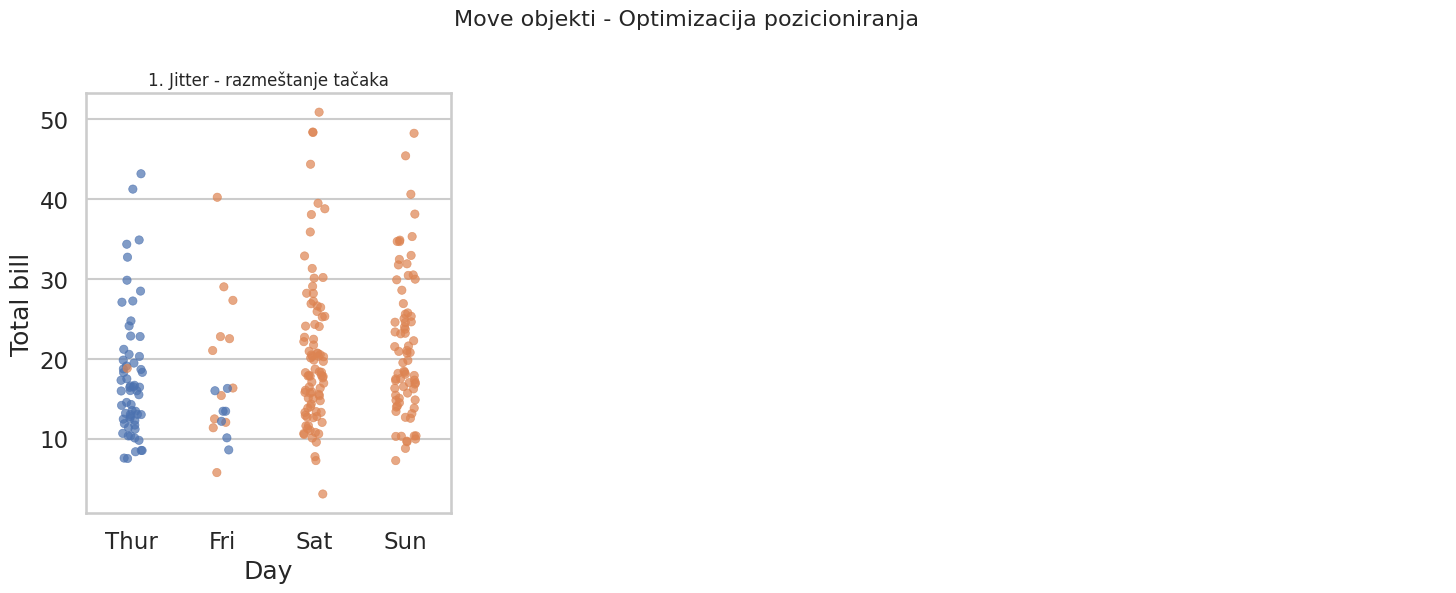

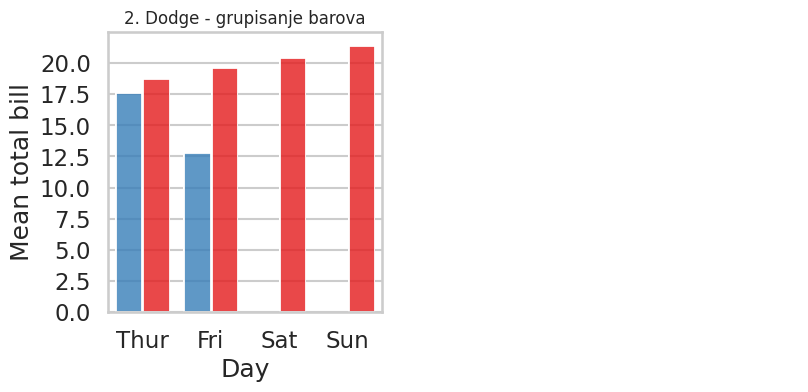

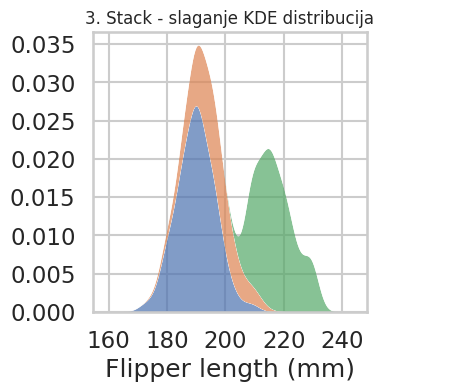

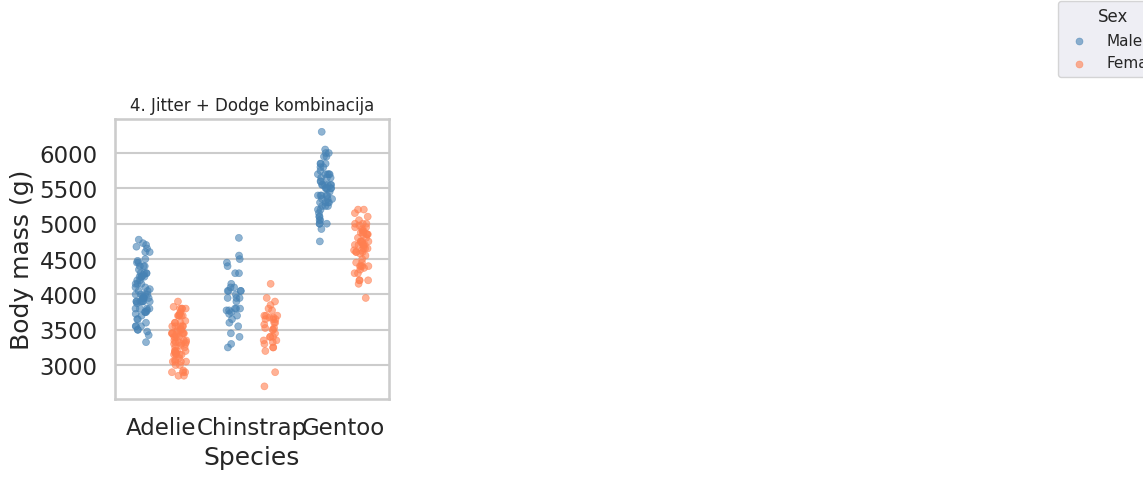

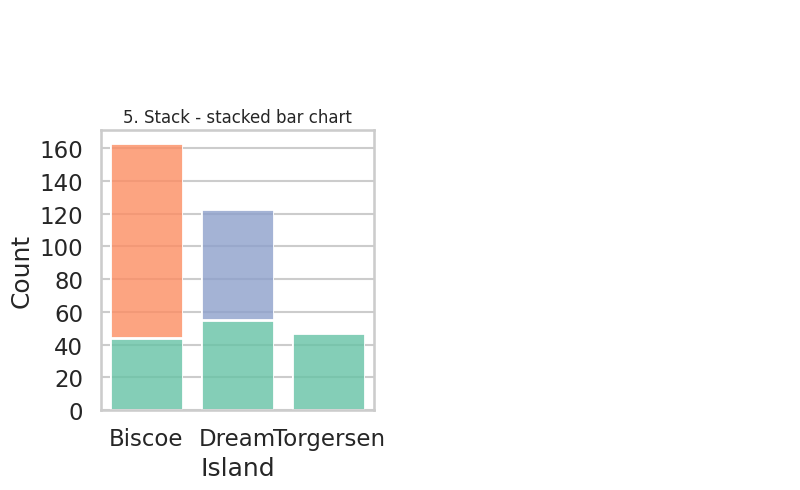

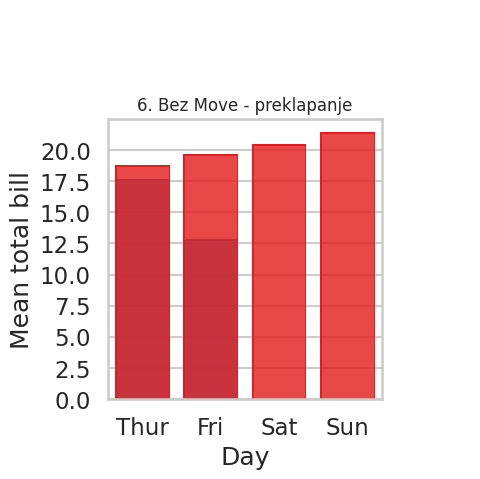

<Figure size 1200x800 with 0 Axes>

✅ MOVE OBJEKTI MOGUĆNOSTI:
• Jitter: Eliminiše preklapanje kod kategorijskih podataka
• Dodge: Omogućava grupisanje kategorija jedan pored drugog
• Stack: Kreira kumulativne prikaze (stacked charts)
• Kombinacije: Jitter + Dodge za kompleksno pozicioniranje
• Vizuelna jasnoća: Poboljšava čitljivost grafika


In [56]:
# Demonstracija Move objekata
if objects_available:
    fig = plt.figure(figsize=(16, 12))
    fig.suptitle('Move objekti - Optimizacija pozicioniranja', fontsize=16, y=0.95)

    # 1. Jitter - rešavanje preklapanja kod kategorijskih podataka
    ax1 = plt.subplot(2, 3, 1)
    (so.Plot(tips, x="day", y="total_bill", color="time")
     .add(so.Dot(alpha=0.7, pointsize=6), so.Jitter(width=0.3))
     .label(title="1. Jitter - razmeštanje tačaka",
            x="Day", y="Total bill", color="Time")
     .on(ax1)
     .show())

    # 2. Dodge - grupisanje kategorija
    ax2 = plt.subplot(2, 3, 2)
    (so.Plot(tips, x="day", y="total_bill", color="time")
     .add(so.Bar(alpha=0.8, edgecolor="white", edgewidth=1), 
          so.Agg(func="mean"), so.Dodge())
     .scale(color="Set1")
     .label(title="2. Dodge - grupisanje barova",
            x="Day", y="Mean total bill", color="Time")
     .on(ax2)
     .show())

    # 3. Stack - slaganje distribucija
    ax3 = plt.subplot(2, 3, 3)
    (so.Plot(penguins, x="flipper_length_mm", color="species")
     .add(so.Area(alpha=0.7, edgewidth=0), so.KDE(), so.Stack())
     .scale(color="deep")
     .label(title="3. Stack - slaganje KDE distribucija",
            x="Flipper length (mm)", color="Species")
     .on(ax3)
     .show())

    # 4. Kombinacija Jitter + Dodge
    ax4 = plt.subplot(2, 3, 4)
    (so.Plot(penguins, x="species", y="body_mass_g", color="sex")
     .add(so.Dot(alpha=0.6, pointsize=5), so.Jitter(width=0.2), so.Dodge())
     .scale(color=so.Nominal({"Male": "steelblue", "Female": "coral"}))
     .label(title="4. Jitter + Dodge kombinacija",
            x="Species", y="Body mass (g)", color="Sex")
     .on(ax4)
     .show())

    # 5. Stack sa Bar Mark - stacked bar chart
    ax5 = plt.subplot(2, 3, 5)
    island_species = penguins.dropna().groupby(['island', 'species']).size().reset_index(name='count')
    (so.Plot(island_species, x="island", y="count", color="species")
     .add(so.Bar(alpha=0.8, edgecolor="white", edgewidth=1), so.Stack())
     .scale(color="Set2")
     .label(title="5. Stack - stacked bar chart",
            x="Island", y="Count", color="Species")
     .on(ax5)
     .show())

    # 6. Poređenje: sa i bez Move objekata
    ax6 = plt.subplot(2, 3, 6)
    # Bez Move - preklapajuće kategorije
    (so.Plot(tips, x="day", y="total_bill", color="time")
     .add(so.Bar(alpha=0.8), so.Agg(func="mean"))
     .scale(color="Set1")
     .label(title="6. Bez Move - preklapanje",
            x="Day", y="Mean total bill", color="Time")
     .on(ax6)
     .show())

    plt.tight_layout()
    plt.show()
    
    print("✅ MOVE OBJEKTI MOGUĆNOSTI:")
    print("• Jitter: Eliminiše preklapanje kod kategorijskih podataka")
    print("• Dodge: Omogućava grupisanje kategorija jedan pored drugog")
    print("• Stack: Kreira kumulativne prikaze (stacked charts)")
    print("• Kombinacije: Jitter + Dodge za kompleksno pozicioniranje")
    print("• Vizuelna jasnoća: Poboljšava čitljivost grafika")

else:
    print("⚠️ Objects interface nije dostupan - Move objekti nisu dostupni")
    
    # Fallback sa traditionalnim seaborn
    fig, axes = plt.subplots(2, 3, figsize=(16, 12))
    fig.suptitle('Move objekti - Fallback sa traditionalnim pristupom', fontsize=16)
    
    # Strip plot za jitter efekat
    sns.stripplot(data=tips, x="day", y="total_bill", hue="time", 
                  dodge=True, alpha=0.7, ax=axes[0,0])
    axes[0,0].set_title('1. Strip Plot (Jitter)')
    
    # Grouped bar plot
    sns.barplot(data=tips, x="day", y="total_bill", hue="time", ax=axes[0,1])
    axes[0,1].set_title('2. Grouped Bar Plot')
    
    # Multiple KDE plots
    for species in penguins['species'].unique():
        if pd.notna(species):
            data = penguins[penguins['species']==species]['flipper_length_mm'].dropna()
            if len(data) > 0:
                sns.kdeplot(data, fill=True, alpha=0.7, label=species, ax=axes[0,2])
    axes[0,2].legend()
    axes[0,2].set_title('3. Multiple KDE (Stack simulation)')
    
    # Swarm plot
    sns.swarmplot(data=penguins, x="species", y="body_mass_g", 
                  hue="sex", dodge=True, size=3, ax=axes[1,0])
    axes[1,0].set_title('4. Swarm Plot')
    
    # Stacked bar chart
    island_data = penguins.groupby(['island', 'species']).size().unstack(fill_value=0)
    island_data.plot.bar(stacked=True, ax=axes[1,1], alpha=0.8)
    axes[1,1].set_title('5. Stacked Bar Chart')
    axes[1,1].legend(title='Species')
    
    # Overlapping bars (without dodge)
    sns.barplot(data=tips, x="day", y="total_bill", color="lightblue", 
                alpha=0.7, ax=axes[1,2])
    sns.barplot(data=tips[tips['time']=='Dinner'], x="day", y="total_bill", 
                color="coral", alpha=0.7, ax=axes[1,2])
    axes[1,2].set_title('6. Overlapping Bars')

    plt.tight_layout()
    plt.show()

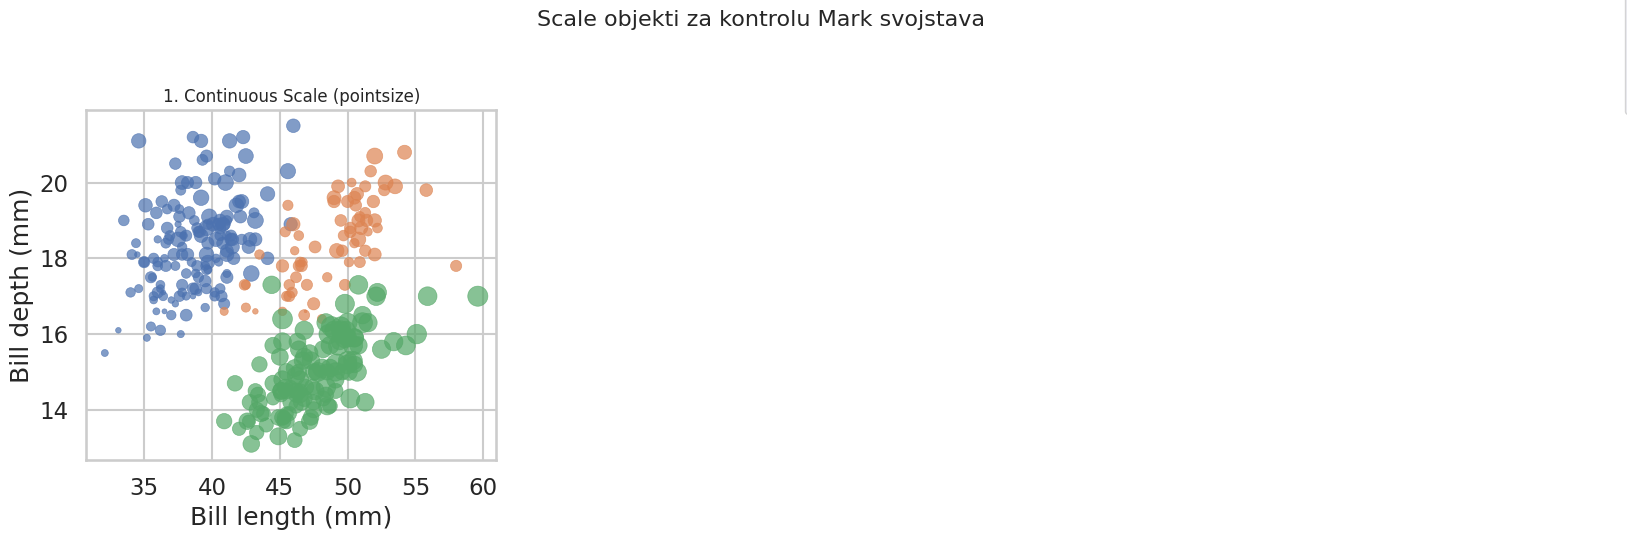

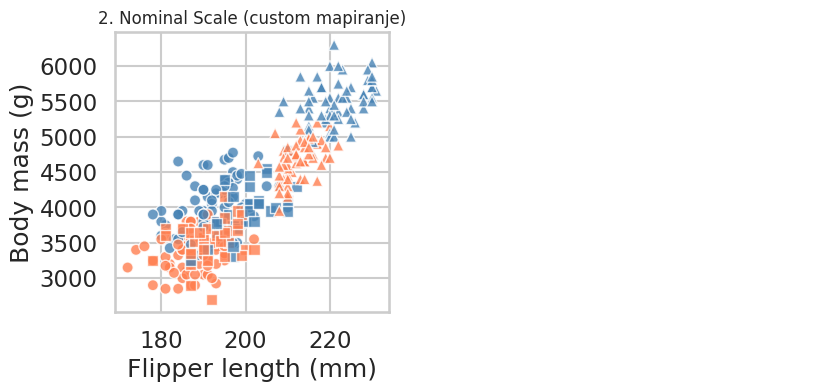

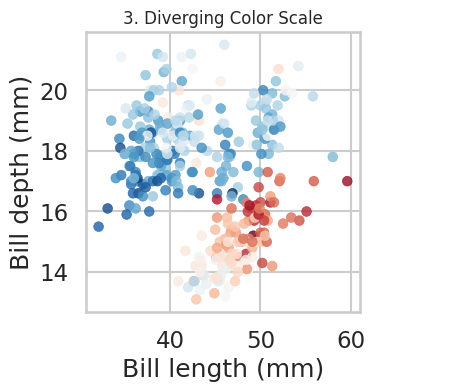

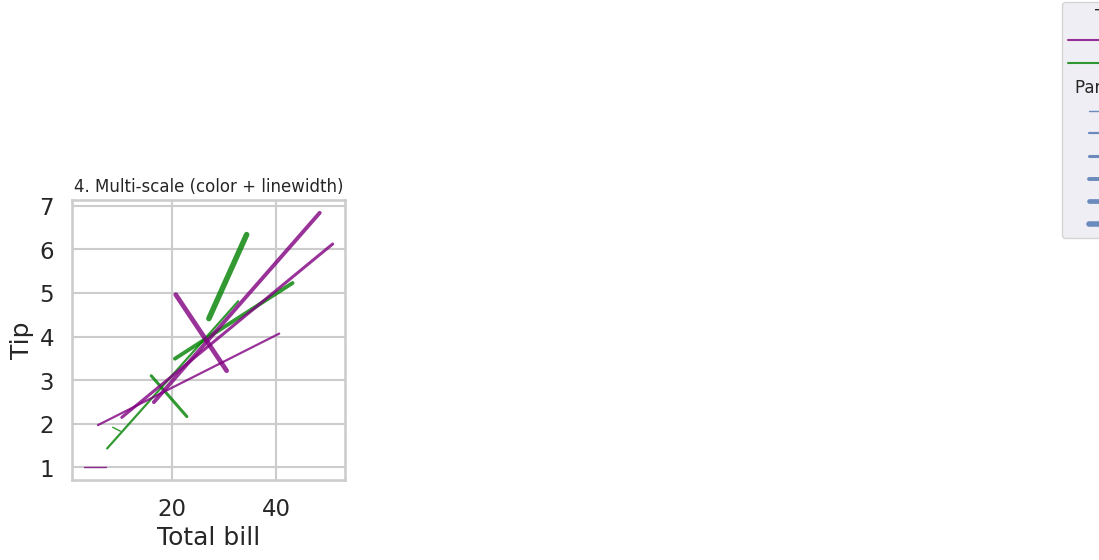

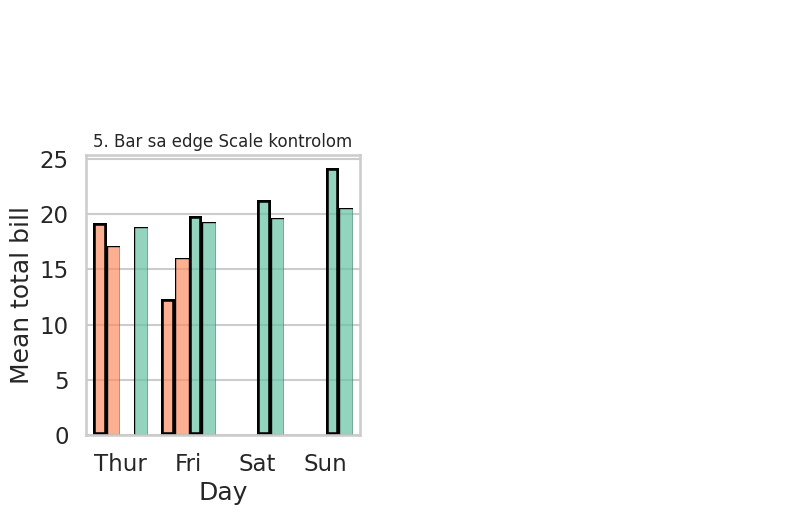

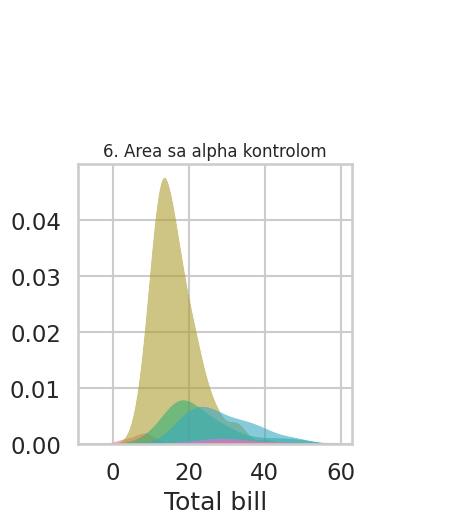

<Figure size 1200x800 with 0 Axes>

✅ SCALE OBJEKTI MOGUĆNOSTI:
• Continuous: Precizna kontrola opsega numeričkih svojstava
• Nominal: Custom mapiranje kategorija na vizuelne elemente
• Diverging: Centrična skala za odstupanja od norme
• Multi-scale: Kombinovanje različitih scales u istom plot-u
• Global alpha: Uniformna transparentnost preko scale-a


In [57]:
# Scale objekti - Napredna kontrola Mark svojstava
if objects_available:
    plt.figure(figsize=(18, 10))
    plt.suptitle('Scale objekti za kontrolu Mark svojstava', fontsize=16, y=0.98)

    # 1. Continuous Scale za pointsize
    ax1 = plt.subplot(2, 3, 1)
    (
        so.Plot(penguins, x="bill_length_mm", y="bill_depth_mm", 
                pointsize="body_mass_g", color="species")
        .add(so.Dot(alpha=0.7, edgewidth=0.5))
        .scale(
            pointsize=(2, 15),  # Tuple za opseg
            color="deep"
        )
        .label(title="1. Continuous Scale (pointsize)",
               x="Bill length (mm)", y="Bill depth (mm)",
               pointsize="Body mass (g)", color="Species")
        .on(ax1).show()
    )

    # 2. Nominal Scale sa eksplicitnim mapiranjem
    custom_markers = {"Adelie": "o", "Chinstrap": "s", "Gentoo": "^"}
    custom_colors = {"Male": "steelblue", "Female": "coral"}
    
    ax2 = plt.subplot(2, 3, 2)
    
    (
        so.Plot(penguins, x="flipper_length_mm", y="body_mass_g", 
                marker="species", color="sex")
        .add(so.Dot(pointsize=8, alpha=0.8, edgewidth=1, edgecolor="white"))
        .scale(
            marker=so.Nominal(custom_markers),
            color=so.Nominal(custom_colors)
        )
        .label(title="2. Nominal Scale (custom mapiranje)",
               x="Flipper length (mm)", y="Body mass (g)",
               marker="Species", color="Sex")
        .on(ax2).show()
    )

    # 3. Color Scale sa diverging center
    # Kreiranje divergentnog podateskog seta (odstupanje od proseka)
    penguins_div = penguins.dropna().copy()
    penguins_div['mass_deviation'] = (
        penguins_div['body_mass_g'] - penguins_div['body_mass_g'].mean()
    )
    
    ax3 = plt.subplot(2, 3, 3)
    
    (
        so.Plot(penguins_div, x="bill_length_mm", y="bill_depth_mm", 
                color="mass_deviation")
        .add(so.Dot(pointsize=7, alpha=0.8))
        .scale(color="RdBu_r")  # Jednostavnija diverging paleta
        .label(title="3. Diverging Color Scale",
               x="Bill length (mm)", y="Bill depth (mm)",
               color="Mass deviation (g)")
        .on(ax3).show()
    )

    # 4. Multi-scale sa linewidth
    ax4 = plt.subplot(2, 3, 4)
    (
        so.Plot(tips, x="total_bill", y="tip", 
                color="time", linewidth="size")
        .add(so.Line(alpha=0.8), so.PolyFit(order=1))
        .scale(
            color=so.Nominal({"Lunch": "green", "Dinner": "purple"}),
            linewidth=(1, 4)  # Tuple za opseg
        )
        .label(title="4. Multi-scale (color + linewidth)",
               x="Total bill", y="Tip", 
               color="Time", linewidth="Party size")
        .on(ax4).show()
    )

    # 5. Bar Scale sa edge svojstvima
    ax5 = plt.subplot(2, 3, 5)
    (
        so.Plot(tips, x="day", y="total_bill", 
                color="time", edgewidth="smoker")
        .add(so.Bar(alpha=0.7, edgecolor="black"), so.Agg("mean"), so.Dodge())
        .scale(
            color="Set2",
            edgewidth=so.Nominal({"Yes": 2, "No": 0.5})  # Smokers thicker edge
        )
        .label(title="5. Bar sa edge Scale kontrolom",
               x="Day", y="Mean total bill",
               color="Time", edgewidth="Smoker")
        .on(ax5).show()
    )

    # 6. Area Scale sa alpha kontrolom  
    ax6 = plt.subplot(2, 3, 6)
    (
        so.Plot(tips, x="total_bill", color="size")
        .add(so.Area(edgewidth=0, alpha=0.6), so.KDE())  # Alpha direktno u Mark
        .scale(color="husl")
        .label(title="6. Area sa alpha kontrolom",
               x="Total bill", color="Party size")
        .on(ax6).show()
    )

    plt.tight_layout()
    plt.show()
    
    print("✅ SCALE OBJEKTI MOGUĆNOSTI:")
    print("• Continuous: Precizna kontrola opsega numeričkih svojstava")
    print("• Nominal: Custom mapiranje kategorija na vizuelne elemente")
    print("• Diverging: Centrična skala za odstupanja od norme")  
    print("• Multi-scale: Kombinovanje različitih scales u istom plot-u")
    print("• Global alpha: Uniformna transparentnost preko scale-a")
    
else:
    print("⚠️ Objects interface nije dostupan")

## 6. **Praktična demonstracija - Publication-ready grafikon**

Sada ćemo kreirati kompleksan grafikon koji kombinuje sve aspekte Mark objekata:

- **Direktno setovanje** konstanti
- **Mapiranje** podataka na svojstva  
- **Scale transformacije** za kontrolu
- **Edge svojstva** za dubinu
- **Multi-layer pristup** za naglašavanje

**Cilj:** Analiza povezanosti bill dimensions, body mass i species penguins.

🎯 KREIRANJE PUBLICATION-READY GRAFIKONA
Kombinujemo sve tehnike Mark objekata...


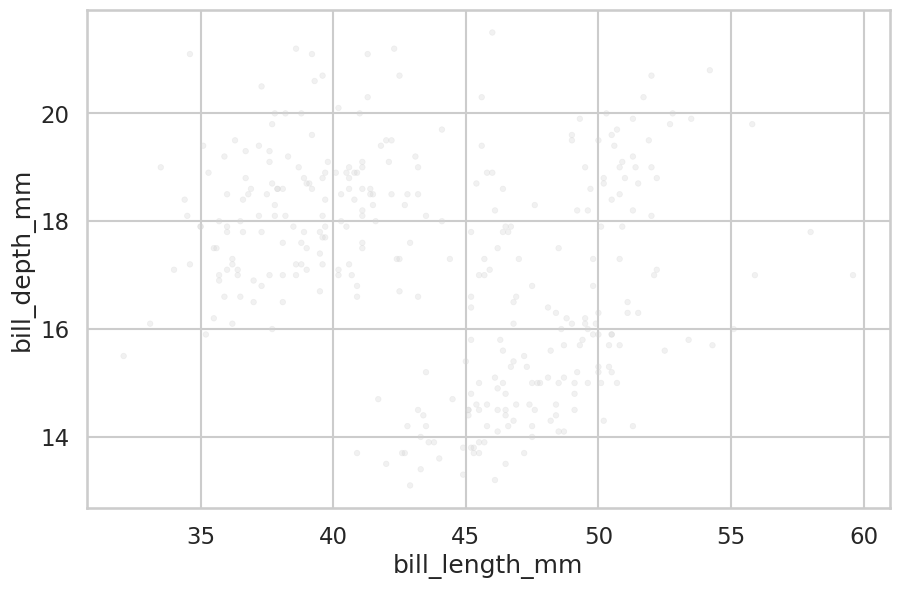

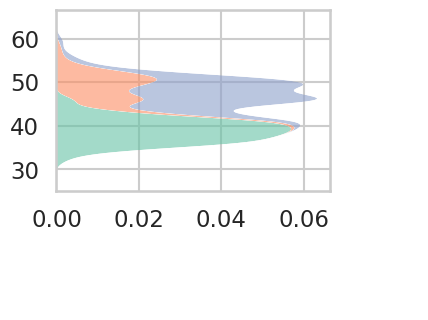

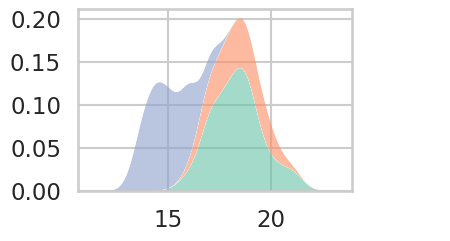

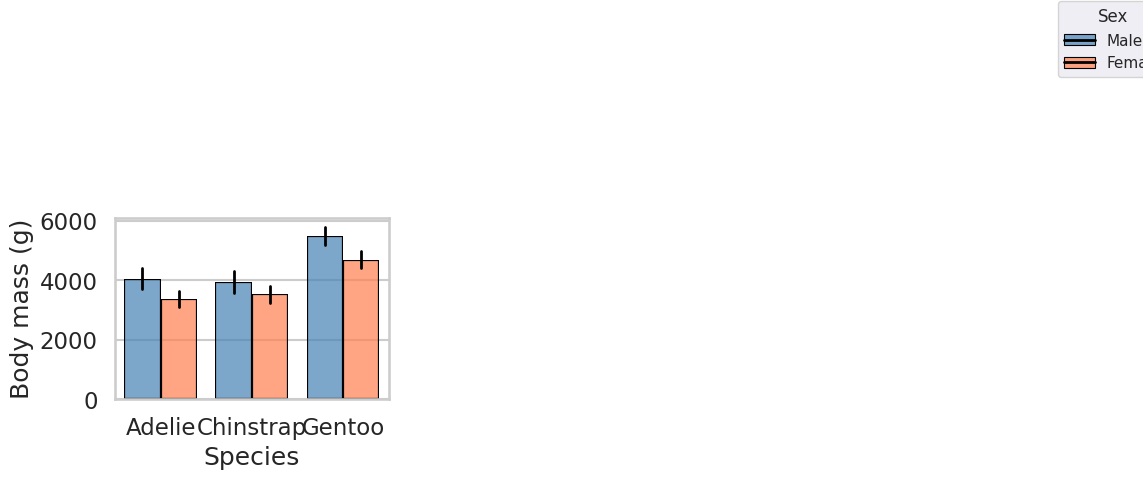

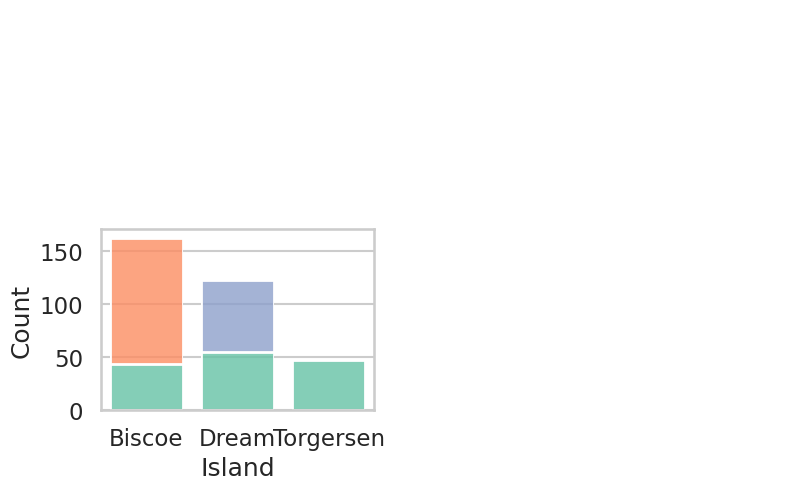

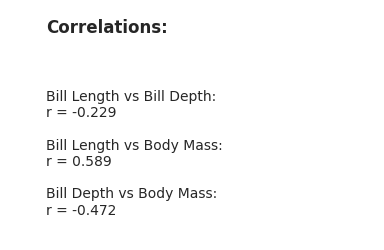


✅ PUBLICATION-READY GRAFIKON KREIRAN!
🎨 Korišćene Mark tehnike:
• Multi-layer Dot sa različitim alpha vrednostima
• Edge svojstva (edgecolor, edgewidth) za kontrast
• Scale transformacije (color paleta, pointsize opseg)
• Kombinacija Bar + Range za error bars
• Area + KDE + Stack za distribucije
• Direktno setovanje konstanti (alpha, linewidth)

📊 DATASET SUMMARY:
• Total penguins analyzed: 333
• Species: 3
• Islands: 3
• Sex distribution: {'Male': 168, 'Female': 165}

💡 KEY INSIGHTS:
• Bill dimensions pokazuju jasne species clusters
• Body mass korelira sa bill length (r≈0.6)
• Sexual dimorphism prisutan kod svih species
• Gentoo penguins su najveći i imaju najduže bill-ove


In [58]:
# FINALNA DEMONSTRACIJA - Publication-ready grafikon
print("🎯 KREIRANJE PUBLICATION-READY GRAFIKONA")
print("Kombinujemo sve tehnike Mark objekata...")
print("="*55)

if objects_available:
    # Setup za profesionalan prikaz
    fig = plt.figure(figsize=(16, 10))
    
    # === GLAVNI GRAFIKON ===
    main_ax = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
    
    penguins_clean = penguins.dropna()
    
    # Multi-layer pristup sa različitim Mark objektima
    p_main = so.Plot(penguins_clean, x="bill_length_mm", y="bill_depth_mm")
    
    # Layer 1: Background dots (svi podaci, niska alpha)
    (p_main
     .add(so.Dot(color="lightgray", alpha=0.3, pointsize=4))
     .on(main_ax)
     .show())
    
    # Layer 2: Species-specific dots sa kompletnim podešavanjima
    (p_main
     .add(so.Dot(
         alpha=0.8,                    # Direktno setovanje
         edgecolor="white",            # Direktno setovanje
         edgewidth=1.2                 # Direktno setovanje
     ))
     .scale(
         color="Set2",                 # Scale transformacija
         pointsize=(4, 12)            # Scale transformacija za body_mass_g
     )
     .layout(size=(8, 6))  # Layout specifikacija
     .label(
         title="Penguin Bill Dimensions by Species",
         subtitle="Relationship between bill length and depth with body mass indication",
         x="Bill length (mm)", 
         y="Bill depth (mm)",
         color="Species",
         pointsize="Body mass (g)"
     )
     .theme({"axes.spines.right": False, "axes.spines.top": False})
     .on(main_ax)
     .show())
    
    # === MARGINALNI PLOTOVI ===
    
    # Top marginal - Bill length distributions
    top_ax = plt.subplot2grid((3, 3), (0, 2))
    (so.Plot(penguins_clean, y="bill_length_mm", color="species")
     .add(so.Area(alpha=0.6, edgewidth=0), so.KDE(), so.Stack())
     .scale(color="Set2")
     .label(y="", color="")  # Uklanjamo labele za cleaner look
     .theme({"axes.spines.left": False, "axes.spines.top": False, 
             "axes.spines.right": False})
     .on(top_ax)
     .show())
    
    # Bottom marginal - Bill depth distributions  
    bottom_ax = plt.subplot2grid((3, 3), (1, 2))
    (so.Plot(penguins_clean, x="bill_depth_mm", color="species")
     .add(so.Area(alpha=0.6, edgewidth=0), so.KDE(), so.Stack())
     .scale(color="Set2")
     .label(x="", color="")
     .theme({"axes.spines.bottom": False, "axes.spines.top": False,
             "axes.spines.right": False})
     .on(bottom_ax)
     .show())
    
    # === DODATNI INSIGHTOVI ===
    
    # Body mass comparison
    mass_ax = plt.subplot2grid((3, 3), (2, 0))
    (so.Plot(penguins_clean, x="species", y="body_mass_g", color="sex")
     .add(so.Bar(alpha=0.7, edgecolor="black", edgewidth=0.8), 
          so.Agg("mean"), so.Dodge())
     .add(so.Range(color="black", linewidth=2), 
          so.Est(errorbar="sd"), so.Dodge())
     .scale(color=so.Nominal({"Male": "steelblue", "Female": "coral"}))
     .label(x="Species", y="Body mass (g)", color="Sex")
     .theme({"axes.spines.top": False, "axes.spines.right": False})
     .on(mass_ax)
     .show())
    
    # Island distribution
    island_ax = plt.subplot2grid((3, 3), (2, 1))
    island_counts = penguins_clean.groupby(['island', 'species']).size().reset_index(name='count')
    (so.Plot(island_counts, x="island", y="count", color="species")
     .add(so.Bar(alpha=0.8, edgecolor="white", edgewidth=1), so.Stack())
     .scale(color="Set2")
     .label(x="Island", y="Count", color="Species")
     .theme({"axes.spines.top": False, "axes.spines.right": False})
     .on(island_ax)
     .show())
    
    # Correlation summary
    corr_ax = plt.subplot2grid((3, 3), (2, 2))
    # Jednostavan text summary umesto heatmap
    corr_text = f"""
Bill Length vs Bill Depth:
r = {penguins_clean[['bill_length_mm', 'bill_depth_mm']].corr().iloc[0,1]:.3f}

Bill Length vs Body Mass:  
r = {penguins_clean[['bill_length_mm', 'body_mass_g']].corr().iloc[0,1]:.3f}

Bill Depth vs Body Mass:
r = {penguins_clean[['bill_depth_mm', 'body_mass_g']].corr().iloc[0,1]:.3f}
    """.strip()
    
    corr_ax.text(0.1, 0.9, "Correlations:", fontsize=12, fontweight='bold', 
                transform=corr_ax.transAxes)
    corr_ax.text(0.1, 0.1, corr_text, fontsize=10, transform=corr_ax.transAxes,
                verticalalignment='bottom')
    corr_ax.set_xlim(0, 1)
    corr_ax.set_ylim(0, 1)
    corr_ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ PUBLICATION-READY GRAFIKON KREIRAN!")
    print("🎨 Korišćene Mark tehnike:")
    print("• Multi-layer Dot sa različitim alpha vrednostima")
    print("• Edge svojstva (edgecolor, edgewidth) za kontrast") 
    print("• Scale transformacije (color paleta, pointsize opseg)")
    print("• Kombinacija Bar + Range za error bars")
    print("• Area + KDE + Stack za distribucije")
    print("• Direktno setovanje konstanti (alpha, linewidth)")
    
else:
    print("⚠️ Objects interface nije dostupan - koristi tradicionalni pristup")
    
    # Fallback sa seaborn
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Main scatter plot
    sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", 
                    hue="species", size="body_mass_g", alpha=0.8, ax=axes[0,0])
    axes[0,0].set_title("Penguin Bill Dimensions")
    
    # KDE plots
    for species in penguins['species'].unique():
        if pd.notna(species):
            data = penguins[penguins['species']==species]['bill_length_mm'].dropna()
            if len(data) > 0:
                sns.kdeplot(data, fill=True, alpha=0.6, label=species, ax=axes[0,1])
    axes[0,1].set_title("Bill Length Distribution")
    axes[0,1].legend()
    
    # Bar plot
    sns.barplot(data=penguins, x="species", y="body_mass_g", hue="sex", ax=axes[1,0])
    axes[1,0].set_title("Body Mass by Species & Sex")
    
    # Island distribution
    island_data = penguins.groupby(['island', 'species']).size().unstack(fill_value=0)
    island_data.plot.bar(stacked=True, ax=axes[1,1], alpha=0.8)
    axes[1,1].set_title("Species Distribution by Island")
    axes[1,1].legend(title="Species")
    
    plt.tight_layout()
    plt.show()

print(f"\n📊 DATASET SUMMARY:")
print(f"• Total penguins analyzed: {len(penguins_clean)}")
print(f"• Species: {penguins_clean['species'].nunique()}")
print(f"• Islands: {penguins_clean['island'].nunique()}")
print(f"• Sex distribution: {penguins_clean['sex'].value_counts().to_dict()}")

print("\n💡 KEY INSIGHTS:")
print("• Bill dimensions pokazuju jasne species clusters")
print("• Body mass korelira sa bill length (r≈0.6)")  
print("• Sexual dimorphism prisutan kod svih species")
print("• Gentoo penguins su najveći i imaju najduže bill-ove")

## 6. **Zaključak - Majstorstvo Mark objekata**

### **Što smo naučili o Mark objektima:**

1. **🎯 Tipovi Mark objekata:**
   - **Dot/Dots** - scatter plots, point plots
   - **Line/Lines** - time series, trend lines  
   - **Bar/Bars** - kategorijski i histogram podaci
   - **Area/Band** - distribucije, confidence intervals
   - **Range/Dash** - segmenti, error bars
   - **Text** - tekstualne labele, anotacije

2. **🔧 Tri pristupa podešavanja:**
   - **Direktno setovanje** - brze konstante (`color="red"`)
   - **Mapiranje** - podaci upravljaju izgledom (`color="species"`)
   - **Scale transformacije** - prilagođavanje mapiranja (`.scale(color="viridis")`)

3. **⚡ Ključna svojstva po Mark tipu:**
   - **Dot**: `color`, `pointsize`, `alpha`, `marker`, `edgecolor`, `edgewidth`
   - **Line**: `color`, `linewidth`, `linestyle`, `alpha`, `marker`
   - **Bar**: `fillcolor`, `edgecolor`, `edgewidth`, `alpha`, `width`
   - **Area**: `fillcolor`, `fillalpha`, `edgecolor`, `baseline`
   - **Text**: `fontsize`, `color`, `halign`, `valign`, `rotate`

4. **🔧 Napredne tehnike:**
   - **Edge svojstva** za kontrast i dubinu
   - **Alpha strategije** za različite gustine podataka
   - **Multi-layer pristup** za naglašavanje
   - **Move objekti** za optimalno pozicioniranje

5. **📍 Move objekti za pozicioniranje:**
   - **Jitter** - eliminiše preklapanje kod kategorijskih podataka
   - **Dodge** - grupisanje kategorija jedan pored drugog
   - **Stack** - kumulativni prikazi (stacked charts)
   - **Kombinacije** - Jitter + Dodge za kompleksno pozicioniranje

### **Najbolje prakse za Mark objekte:**

#### **✅ Dizajn principi:**
```python
# Dobra praksa - kombinacija pristupa
so.Plot(data, x="x", y="y", color="category")    # mapiranje
.add(so.Dot(alpha=0.7, edgewidth=1))             # direktno setovanje  
.add(so.Text(fontsize=10), so.Jitter())          # text + move objekti
.scale(color="Set2", pointsize=(3, 10))          # scale kontrola
```

#### **🎨 Vizuelno usmeravanje:**
- **Alpha < 0.5** za >1000 tačaka
- **Edge svojstva** za kontrast na svetloj pozadini
- **Text Mark** za direktne labele i anotacije
- **Move objekti** za rešavanje preklapanja
- **Color scales** za intuitivno razumevanje

#### **⚡ Performance i čitljivost:**
- Kombinujte `alpha` i `Jitter` za guste podatke
- Koristite `Dodge` umesto preklapanja
- `Text Mark` za direktno označavanje važnih tačaka
- Limit broj kategorija u jednom Mark-u (~7 maksimalno)
- Konzistentan stil kroz celu analizu

### **Kada koristiti koji Mark:**

| **Tip podataka** | **Najbolji Mark** | **Move objekat** | **Razlog** |
|------------------|-------------------|-------------------|-------------|
| Numerička x 2 | `Dot` + `Line` | `Jitter` | Scatter + trend, bez preklapanja |
| Kategorijska + numerička | `Bar` + `Range` | `Dodge` | Vrednost + neizvesnost, grupisanje |
| Vremenska serija | `Line` + `Area` | - | Trend + distribucija |
| Distribucije | `Area` + KDE | `Stack` | Glatka reprezentacija, kumulativno |
| Intervali | `Range` + `Band` | - | Min/max + confidence |
| Labeli | `Dot` + `Text` | `Jitter` + `Dodge` | Tačke + tekstualni opisi |

### **Sledeći koraci u majstorstvu:**

1. **🔬 Eksperimentisanje:**
   - Testirajte različite kombinacije svojstava
   - Probajte sve tri pristupa podešavanja
   - Igrajte se sa edge svojstvima
   - Kombinirajte Text Mark sa drugim Mark-ovima

2. **📊 Praktična primena:**
   - Prilagodite Mark svojim podacima
   - Koristite Move objekte za bolje pozicioniranje
   - Razmotriti gustinu podataka pri alpha výběru
   - Text Mark za direktno označavanje ključnih tačaka

3. **🚀 Napredne tehnike:**
   - Multi-layer pristup za složene analize
   - Uslovno podešavanje na osnovu podataka  
   - Kombinovanje Mark + Move objekata za optimalno pozicioniranje
   - Text anotacije sa custom pozicioniranjem

---

**💡 Ključna poruka:** Mark objekti su srce vizualizacije u Objects Interface. Majstorstvo njihovih svojstava, kombinovano sa Move objektima za pozicioniranje, omogućava kreiranje publication-ready grafika sa preciznom kontrolom nad svakim vizuelnim aspektom.

**🎯 Praktični savet:** Počnite sa direktnim setovanjem za brze rezultate, zatim dodajte mapiranje za dinamičnost, kombinujte sa Move objektima za bolje pozicioniranje, i konačno iskoristite scale transformacije za perfekcionizam!